## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID" )

# Display the data table for preview
merge_df

a203 = merge_df.loc[merge_df["Mouse ID"]=="a203"]
a203

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


In [2]:
# Check the number of mice.
# Group data by mouse ID
group = merge_df.groupby(["Mouse ID"])
group.count()

# Gives you columns with strings of columns (to show Ryan)
# group = pd.DataFrame(group)
# group

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup = pd.DataFrame(group["Timepoint"].value_counts())
dup
dup_loc = dup.loc[dup["Timepoint"] > 1]
print(dup_loc)

# Find data on Mouse ID with duplicate to see if the data should be disregarded
data_dup_mouse = merge_df.loc[merge_df["Mouse ID"] == "g989"]
print(data_dup_mouse)

                    Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20  

In [18]:
# Drop any duplicate rows
clean_df = merge_df.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
clean_group_df = pd.DataFrame(clean_df.groupby("Mouse ID").count())
clean_group_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
# Group the clean data by regimen
aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

aggr.columns = ["Tummor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]

aggr_df = pd.DataFrame(aggr)
aggr_df = aggr_df.reset_index()
aggr_df


,Drug Regimen,Tummor Vol Mean,Tumor Vol Median,Tumor Vol SEM,Tumor Vol Variance,Tumor Vol Standard Deviation
0,Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
2,Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
3,Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
4,Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
5,Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
6,Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
7,Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,48.533355,6.966589


## Bar and Pie Charts

           Drug Regimen
Capomulin           230
Ramicane            228
Ketapril            188
Naftisol            186
Zoniferol           182
Placebo             181
Stelasyn            181
Infubinol           178
Ceftamin            178
Propriva            148


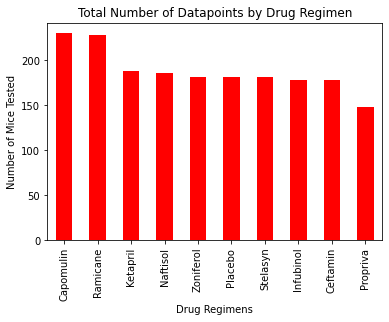

<Figure size 432x288 with 0 Axes>

In [7]:
# Determine datapoints by regimen
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)
print(datapoints_df)

# Generate bar plot using Pandas DataFrame.plot
ax = datapoints_df.plot(kind="bar", facecolor="red",legend=False, title = "Total Number of Datapoints by Drug Regimen", 
                   rot = 90)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Number of Mice Tested')
plt.show()
# Resize plot to display labels
plt.tight_layout()


  Drug Regimen  Datapoints
0    Capomulin         230
1     Ramicane         228
2     Ketapril         188
3     Naftisol         186
4    Zoniferol         182
5      Placebo         181
6     Stelasyn         181
7    Infubinol         178
8     Ceftamin         178
9     Propriva         148


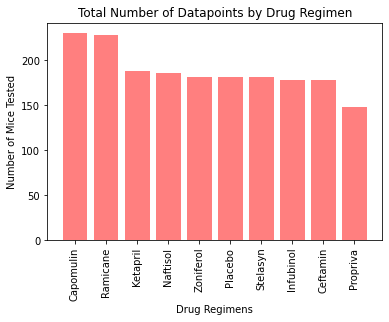

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate identical bar plot using pyplot instead of pandas.

# Rename the columns for matplotlib
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)
datapoints_df = datapoints_df.reset_index()
datapoints_df.columns = ["Drug Regimen", "Datapoints"]
print(datapoints_df)

# Generate bar plot using matplotlib
x_axis = np.arange(len(datapoints))
plt.bar(x_axis, datapoints, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Mice Tested')
plt.title("Total Number of Datapoints by Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, datapoints_df["Drug Regimen"], rotation = 90)
plt.show()
# Resize plot to display labels
plt.tight_layout()


        Sex
Male    125
Female  123


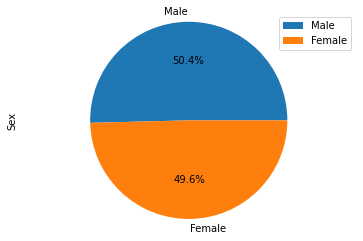

In [9]:
# Collect data for plot
sex_df = pd.DataFrame(clean_df.groupby(["Mouse ID", "Sex"]).count())
sex_df = sex_df.reset_index()
sex_df = pd.DataFrame(sex_df.Sex.value_counts())
print(sex_df)

# Generate a pie plot showing the distribution of female versus male mice using pandas
ax1 = sex_df.plot.pie(y = "Sex", subplots=True, autopct='%1.1f%%')
plt.axis("equal")
# Show plot
plt.show()

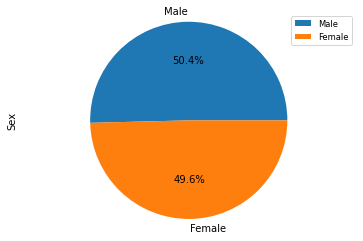

In [10]:
# Generate identical pie plot using pyplot
sex_df.columns
sex = ["Male","Female"]
plt.pie(sex_df.Sex, autopct="%1.1f%%", labels=sex)
plt.ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane,Infubinol, and Ceftamin
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
maxi = clean_df.groupby(["Mouse ID"]).max()
maxi
# Merge the max timepoint dataframe with the original data
merge_vol_df = pd.merge(maxi, clean_df, on = ["Mouse ID","Timepoint"], how = "left")
merge_vol_df.reset_index()
print(merge_vol_df.loc[merge_vol_df["Drug Regimen_x"]=="Capomulin"])

    Mouse ID Drug Regimen_x   Sex_x  Age_months_x  Weight (g)_x  Timepoint  \
19      b128      Capomulin  Female             9            22         45   
24      b742      Capomulin    Male             7            21         45   
61      f966      Capomulin    Male            16            17         20   
64      g288      Capomulin    Male             3            19         45   
66      g316      Capomulin  Female            22            22         45   
80      i557      Capomulin  Female             1            24         45   
83      i738      Capomulin  Female            23            20         45   
85      j119      Capomulin  Female             7            23         45   
87      j246      Capomulin  Female            21            21         35   
108     l509      Capomulin    Male            17            21         45   
115     l897      Capomulin    Male            17            19         45   
121     m601      Capomulin    Male            22            17 

In [58]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
list_drug = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
vol_list = []
for treatment in list_drug:
    volume = merge_vol_df.loc[merge_vol_df["Drug Regimen_x"]==treatment,"Tumor Volume (mm3)_y"]
    vol_list.append(volume)
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume <lower_bound) | (volume > upper_bound)] 
    print(f"{treatment}'s potential outliers: {outliers}")

print(vol_list)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_y, dtype: float64)
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3)_y, dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.

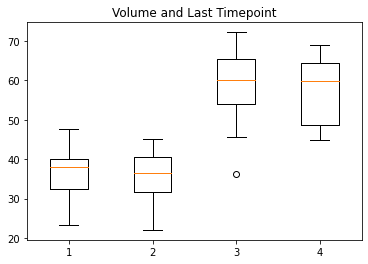

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
# fig1, ax1, ax2, ax3, ax4 = plt.subplots()
# ax1.set_title('Final Tumor Volume for Capomulin, Ramicane,Infubinol, and Ceftamin')
# ax1.set_ylabel('Tumor Volume')
# ax1.boxplot(i)
# ax2.boxplot(c)

data = vol_list
fig7, ax = plt.subplots()
ax.set_title('Volume and Last Timepoint')
ax.boxplot(data)

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights